In [3]:
#!pip install ktrain
!pip install --upgrade tensorflow

     |████████████████████████████████| 421.8MB 38kB/s 
     |████████████████████████████████| 3.9MB 21.2MB/s 
     |████████████████████████████████| 450kB 51.5MB/s 
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [1]:
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import re

using Keras version: 2.2.4-tf


In [0]:
train=pd.read_csv("/content/drive/My Drive/tweeter/train.csv")
test=pd.read_csv("/content/drive/My Drive/tweeter/test.csv")
sub=pd.read_csv("/content/drive/My Drive/tweeter/sample_submission.csv")

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [0]:
target=train["target"]

In [0]:
train.drop('target',1,inplace=True)
train_test_data = train.append(test)
train_test_data.reset_index(inplace=True)

In [0]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [0]:
train_test_data['text']=train_test_data['text'].apply(lambda x : remove_URL(x))

In [0]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [0]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [0]:
train_test_data['text']=train_test_data['text'].apply(lambda x: remove_emoji(x))

In [0]:
import string
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [0]:
train_test_data['text']=train_test_data['text'].apply(lambda x: remove_punct(x))

In [0]:
train_test_data["text"]=train_test_data["text"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [0]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def small_case(text):
  text=re.sub("\s\s+" , " ",text)
  pattern = '[0-9]'
  text=re.sub(pattern,'', text)
  text = ' '.join(e for e in text.split() if e not in stop_words)#seprate the tokans and remove the stop words
  text=text.lower()
  return text


In [0]:
train_test_data['text']=train_test_data['text'].apply(lambda x: small_case(x))

In [0]:
final_Train=train_test_data.iloc[:7613,:]
final_Test=train_test_data.iloc[7613:,:]

In [0]:
Train_data=pd.DataFrame()
Train_data["text"]=final_Train["text"]
Train_data["target"]=target

In [0]:
Train_data.head()

,text,target
0,deeds reason earthquake allah forgive,1
1,forest fire near ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,just sent photo ruby alaska smoke wildfires po...,1


In [0]:
#DATA_PATH = '/content/drive/My Drive/tweeter/train.csv'

NUM_WORDS = 50000
MAXLEN = 150
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(Train_data, 
                                                                   'text', # name of column containing review text
                                                                   label_columns=["target"],
                                                                   maxlen=200, 
                                                                   max_features=50000,
                                                                   ngram_range=3)

language: en
Word Counts: 14976
Nrows: 6851
6851 train sequences
train sequence lengths:
	mean : 8
	95percentile : 13
	99percentile : 15
Adding 3-gram features
max_features changed to 122379 with addition of ngrams
Average train sequence length with ngrams: 21
train (w/ngrams) sequence lengths:
	mean : 21
	95percentile : 36
	99percentile : 42
x_train shape: (6851,200)
y_train shape: (6851, 2)
762 test sequences
test sequence lengths:
	mean : 7
	95percentile : 12
	99percentile : 13
Average test sequence length with ngrams: 10
test (w/ngrams) sequence lengths:
	mean : 11
	95percentile : 27
	99percentile : 34
x_test shape: (762,200)
y_test shape: (762, 2)


'(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(DATA_PATH,\n                      \'text\',\n                      label_columns = ["target"],\n                      val_filepath=None, # if None, 10% of data will be used for validation\n                      max_features=NUM_WORDS, maxlen=MAXLEN,\n                      ngram_range=1)'

In [0]:
text.print_text_classifiers()

fasttext: a fastText-like model [http://arxiv.org/pdf/1607.01759.pdf]
logreg: logistic regression using a trainable Embedding layer
nbsvm: NBSVM model [http://www.aclweb.org/anthology/P12-2018]
bigru: Bidirectional GRU with pretrained word vectors [https://arxiv.org/abs/1712.09405]
standard_gru: simple 2-layer GRU with randomly initialized embeddings
bert: Bidirectional Encoder Representations from Transformers (BERT) [https://arxiv.org/abs/1810.04805]
distilbert: distilled, smaller, and faster BERT from Hugging Face [https://arxiv.org/abs/1910.01108]


In [0]:
model = text.text_classifier('fasttext', (x_train, y_train), 
                             preproc=preproc)
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_test, y_test),batch_size=6)

Is Multi-Label? False
compiling word ID features...
maxlen is 200
done.


In [0]:
learner.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 6851 samples
Epoch 1/1024
6851/6851 [==============================] - 96s 14ms/sample - loss: 1.0079 - accuracy: 0.4830
Epoch 2/1024
2838/6851 [===========>..................] - ETA: 55s - loss: 1.7582 - accuracy: 0.5518

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


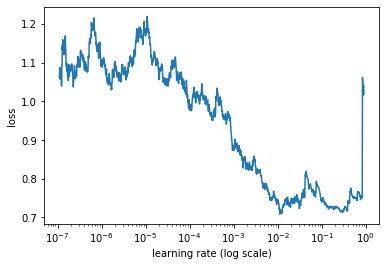

In [0]:
learner.lr_plot()

In [0]:
learner.fit(0.0001, 3, cycle_len=2, cycle_mult=2)

Train on 6851 samples, validate on 762 samples
Epoch 1/14
6851/6851 [==============================] - 96s 14ms/sample - loss: 0.1104 - accuracy: 0.9609 - val_loss: 1.1925 - val_accuracy: 0.8163
Epoch 2/14
6851/6851 [==============================] - 96s 14ms/sample - loss: 0.1040 - accuracy: 0.9616 - val_loss: 1.1969 - val_accuracy: 0.8150
Epoch 3/14
6851/6851 [==============================] - 96s 14ms/sample - loss: 0.0956 - accuracy: 0.9631 - val_loss: 1.2310 - val_accuracy: 0.8123
Epoch 4/14
6851/6851 [==============================] - 96s 14ms/sample - loss: 0.0967 - accuracy: 0.9663 - val_loss: 1.2868 - val_accuracy: 0.8058
Epoch 5/14
6851/6851 [==============================] - 96s 14ms/sample - loss: 0.1049 - accuracy: 0.9615 - val_loss: 1.2418 - val_accuracy: 0.8084
Epoch 6/14
6851/6851 [==============================] - 97s 14ms/sample - loss: 0.1040 - accuracy: 0.9618 - val_loss: 1.2041 - val_accuracy: 0.8136
Epoch 7/14
6851/6851 [==============================] - 98s 14ms/

In [0]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [0]:
.head()

,index,id,keyword,location,text
7613,0,0,NaN,NaN,just happened terrible crash
7614,1,2,NaN,NaN,heard earthquake different cities stay safe ev...
7615,2,3,NaN,NaN,forest fire spot pond geese fleeing across str...
7616,3,9,NaN,NaN,apocalypse lighting spokane wildfires
7617,4,11,NaN,NaN,typhoon soudelor kills china taiwan


In [0]:
pred=predictor.predict(list(final_Test["text"]))

In [0]:
df_output = pd.DataFrame()
df_output['id'] =test["id"]
df_output['target'] =pred
df_output[['id','target']].to_csv('/content/drive/My Drive/tweeter/sub_2.1.csv',index=False)

In [0]:
model_2 = text.text_classifier('nbsvm', (x_train, y_train), 
                             preproc=preproc)
learner_2 = ktrain.get_learner(model_2, train_data=(x_train, y_train), val_data=(x_test, y_test),batch_size=6)

Is Multi-Label? False
compiling word ID features...
maxlen is 200
building document-term matrix... this may take a few moments...
rows: 1-6851
computing log-count ratios...
done.


In [0]:
learner_2.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 6851 samples
Epoch 1/1024
6851/6851 [==============================] - 5s 681us/sample - loss: 0.6677 - accuracy: 0.5914
Epoch 2/1024
2250/6851 [========>.....................] - ETA: 2s - loss: 0.8129 - accuracy: 0.8036

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


In [0]:
learner_2.lr_find()

simulating training for different learning rates... this may take a few moments...
Train on 6851 samples
Epoch 1/1024
6851/6851 [==============================] - 4s 621us/sample - loss: 0.6680 - accuracy: 0.6027
Epoch 2/1024
2244/6851 [========>.....................] - ETA: 2s - loss: 0.7372 - accuracy: 0.8097

done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


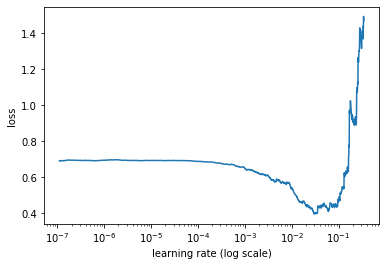

In [0]:
learner_2.lr_plot()

In [0]:
learner_2.fit(0.01, 3, cycle_len=2, cycle_mult=2)

Train on 6851 samples, validate on 762 samples
Epoch 1/14
6851/6851 [==============================] - 4s 596us/sample - loss: 0.4530 - accuracy: 0.7968 - val_loss: 0.4641 - val_accuracy: 0.8110
Epoch 2/14
6851/6851 [==============================] - 4s 623us/sample - loss: 0.0914 - accuracy: 0.9758 - val_loss: 0.4636 - val_accuracy: 0.8136
Epoch 3/14
6851/6851 [==============================] - 4s 599us/sample - loss: 0.1105 - accuracy: 0.9677 - val_loss: 0.5044 - val_accuracy: 0.8110
Epoch 4/14
6851/6851 [==============================] - 4s 623us/sample - loss: 0.0745 - accuracy: 0.9742 - val_loss: 0.5152 - val_accuracy: 0.7992
Epoch 5/14
6851/6851 [==============================] - 4s 629us/sample - loss: 0.0511 - accuracy: 0.9801 - val_loss: 0.5234 - val_accuracy: 0.8031
Epoch 6/14
6851/6851 [==============================] - 4s 604us/sample - loss: 0.0399 - accuracy: 0.9850 - val_loss: 0.5272 - val_accuracy: 0.8031
Epoch 7/14
6851/6851 [==============================] - 4s 610us/

In [0]:
learner_2.fit(0.0001, 3, cycle_len=2, cycle_mult=2)

Train on 6851 samples, validate on 762 samples
Epoch 1/14
6851/6851 [==============================] - 4s 654us/sample - loss: 0.0261 - accuracy: 0.9861 - val_loss: 0.8965 - val_accuracy: 0.7913
Epoch 2/14
6851/6851 [==============================] - 4s 630us/sample - loss: 0.0259 - accuracy: 0.9867 - val_loss: 0.8970 - val_accuracy: 0.7913
Epoch 3/14
6851/6851 [==============================] - 4s 624us/sample - loss: 0.0261 - accuracy: 0.9863 - val_loss: 0.8990 - val_accuracy: 0.7913
Epoch 4/14
6851/6851 [==============================] - 4s 630us/sample - loss: 0.0260 - accuracy: 0.9863 - val_loss: 0.9004 - val_accuracy: 0.7913
Epoch 5/14
6851/6851 [==============================] - 4s 610us/sample - loss: 0.0259 - accuracy: 0.9866 - val_loss: 0.9012 - val_accuracy: 0.7913
Epoch 6/14
6851/6851 [==============================] - 4s 620us/sample - loss: 0.0258 - accuracy: 0.9867 - val_loss: 0.9013 - val_accuracy: 0.7913
Epoch 7/14
6851/6851 [==============================] - 4s 645us/